# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \bar{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [189]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [190]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [191]:
def svd_validation(A):
    m,n = A.shape
    u,s,vh = svd(A)
    vh = vh.transpose().conjugate()
    suma = 0
    for j in range(min([m,n])):
        reshapeu = u[:,j].reshape((m,1))
        reshapev = vh[:,j].reshape((1,n))
        suma = suma + s[j]*(reshapeu.dot(reshapev))
    A = np.allclose(A,suma)
    return A

In [192]:
import numpy as np
from scipy.linalg import svd
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

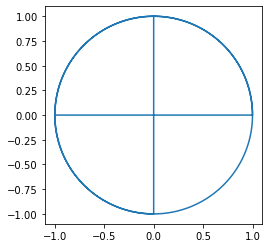

In [195]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [121]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


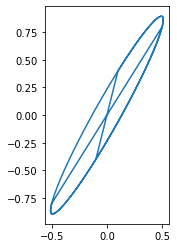

In [122]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [117]:
u, s, vh = svd(A)

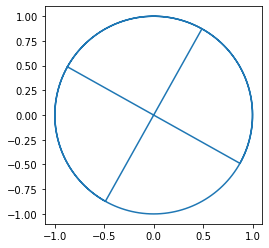

In [123]:
show_circle(u @ circle)

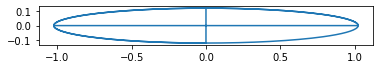

In [127]:
s = np.diag(s) # transformando la matriz columna en una matriz cuadrada
show_circle(s @ circle)

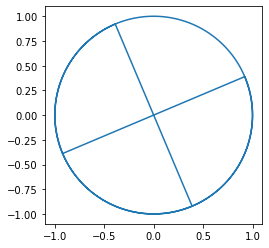

In [128]:
show_circle(vh @ circle)

__Respuesta:__ Que U y V , sean unitarias influye en que la circunferencia mantendrá su tamaño y no tendrá variaciones. Es decir se rota sobre si misma


__Respuesta:__ La relacion de los operadores es que cada uno hace que la circunferencia rote o cambie  su tamaño

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [196]:
from pathlib import Path
from PIL import Image

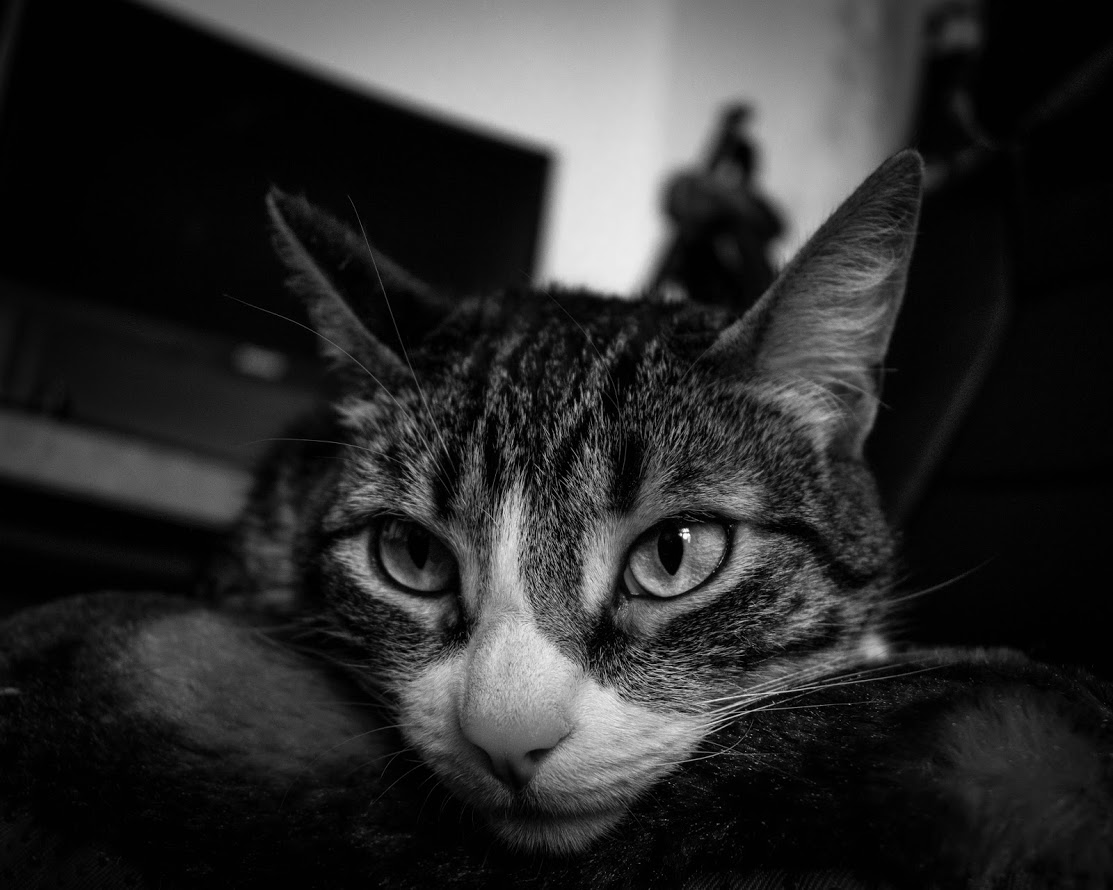

In [240]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

Para convertirla en un numpy array basta con:

In [241]:
cat_np = np.array(cat)
print(cat_np.shape)

(890, 1113)


#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [242]:
def low_rank_svd_approximation(A, l):
    m,n = A.shape
    u,s,vh = svd(A)
    vh = vh.transpose().conjugate()
    suma = 0
    for j in range(l):
        reshapeu = u[:,j].reshape((m,1))
        reshapev = vh[:,j].reshape((1,n))
        suma = suma + s[j]*(reshapeu.dot(reshapev))
    fsum = 0
    for i in range(m):
        for j in range(n):
            fsum = fsum + (A[i,j]-suma[i,j])**2
    fsum = fsum**(1/2)
    print(fsum)
    return suma
            

16045.719753262116


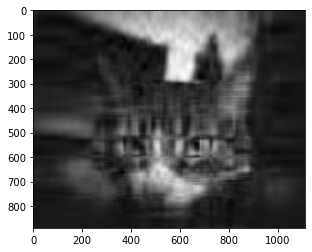

In [243]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

8144.192617834806


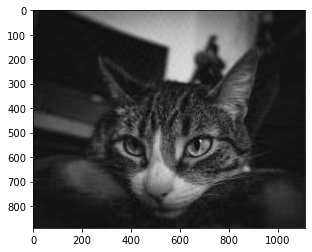

In [244]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

5524.2194086400295


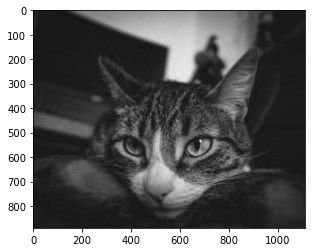

In [245]:
#Agregaremos un cat100, para ver más hd a la coyoya
cat100 = low_rank_svd_approximation(cat_np, l=100)
plt.imshow(cat100, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [246]:
def low_rank_svd_tol_approximation(A, tol):
    m,n = A.shape
    u,s,vh = svd(A)
    vh = vh.transpose().conjugate()
    suma = 0
    for j in range(min([m,n])):
        reshapeu = u[:,j].reshape((m,1))
        reshapev = vh[:,j].reshape((1,n))
        suma = suma + s[j]*(reshapeu.dot(reshapev))
        suma1 = sum(s**2)
        suma2 = sum(s[j+1:]**2)
        testtol = ((suma2)/(suma1))**(1/2)
        if tol > testtol:
            return suma


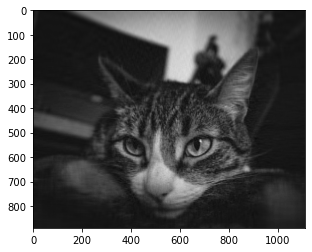

In [247]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

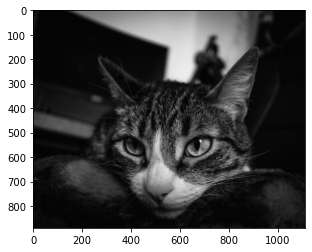

In [248]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

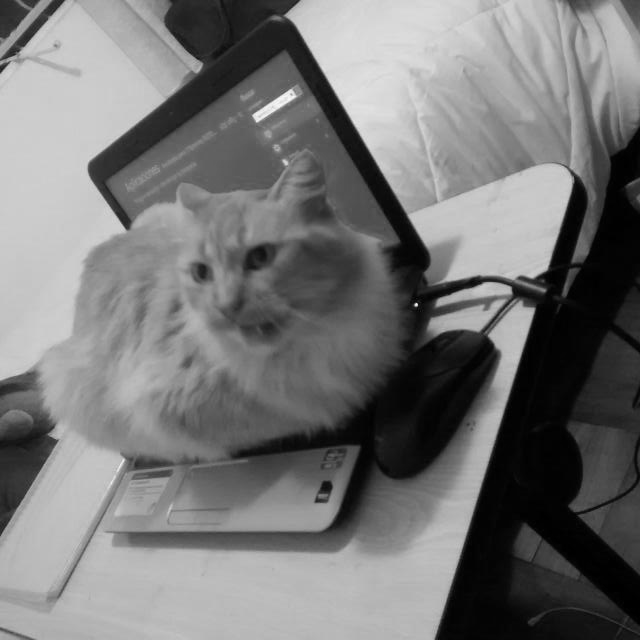

In [233]:
your_img_name = "guardiana.jpeg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L').rotate(90)
your_img

In [235]:
your_img_np = np.array(your_img)

12137.917305474888


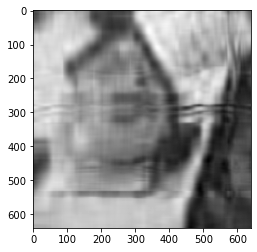

In [236]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

3562.9496404578263


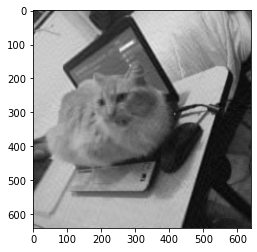

In [251]:
your_img50 = low_rank_svd_approximation(your_img_np, l=50)
plt.imshow(your_img50, cmap='gray');

1706.193072946683


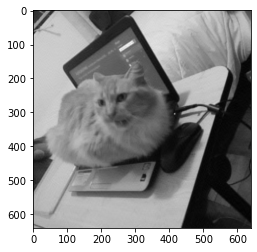

In [250]:
# Una guardiana más hd 
your_img100 = low_rank_svd_approximation(your_img_np, l=100)
plt.imshow(your_img100, cmap='gray');

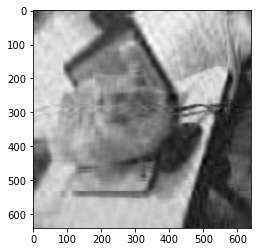

In [238]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

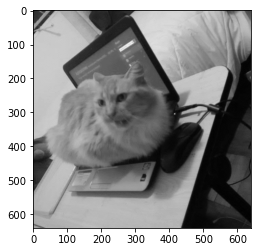

In [239]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ Yo creo que no ,porque tarda demasiado en compilar, por lo tanto deben haber formas más eficientes

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [86]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador siemple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [146]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

,region,codigo_region,comuna,codigo_comuna,poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-12-11,2020-12-14,2020-12-18,2020-12-21,2020-12-25,2020-12-28,2021-01-01,2021-01-04,2021-01-08,tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,10720.0,10798.0,10875.0,10934.0,11028.0,11080.0,11212.0,11296.0,11434.0,4618.8
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,28.0,28.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,2189.8
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,7901.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,2902.6
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,44.0,44.0,44.0,43.0,43.0,44.0,49.0,82.0,NaN


In [147]:
start_date = (2020,10,1)
end_date = (2020,10,11)

In [124]:
covid_comunas.columns

Index(['region', 'codigo_region', 'comuna', 'codigo_comuna', 'poblacion',
       '2020-03-30', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20',
       '2020-04-24', '2020-04-27', '2020-05-01', '2020-05-04', '2020-05-08',
       '2020-05-11', '2020-05-15', '2020-05-18', '2020-05-22', '2020-05-25',
       '2020-05-29', '2020-06-01', '2020-06-05', '2020-06-08', '2020-06-12',
       '2020-06-15', '2020-06-19', '2020-06-23', '2020-06-28', '2020-07-01',
       '2020-07-05', '2020-07-10', '2020-07-13', '2020-07-17', '2020-07-20',
       '2020-07-24', '2020-07-27', '2020-07-31', '2020-08-03', '2020-08-07',
       '2020-08-10', '2020-08-14', '2020-08-17', '2020-08-21', '2020-08-24',
       '2020-08-28', '2020-08-31', '2020-09-04', '2020-09-07', '2020-09-11',
       '2020-09-14', '2020-09-18', '2020-09-21', '2020-09-25', '2020-09-28',
       '2020-10-02', '2020-10-05', '2020-10-09', '2020-10-12', '2020-10-16',
  

In [148]:
covid_comunas = covid_comunas.dropna(subset = ['codigo_comuna'])
print(covid_comunas)

                 region  codigo_region            comuna  codigo_comuna  \
0    Arica y Parinacota             15             Arica        15101.0   
1    Arica y Parinacota             15         Camarones        15102.0   
2    Arica y Parinacota             15     General Lagos        15202.0   
3    Arica y Parinacota             15             Putre        15201.0   
5              Tarapacá              1     Alto Hospicio         1107.0   
..                  ...            ...               ...            ...   
356          Magallanes             12      Punta Arenas        12101.0   
357          Magallanes             12         Rio Verde        12103.0   
358          Magallanes             12      San Gregorio        12104.0   
359          Magallanes             12          Timaukel        12303.0   
360          Magallanes             12  Torres del Paine        12402.0   

     poblacion  2020-03-30  2020-04-01  2020-04-03  2020-04-06  2020-04-08  \
0     247552.0       

In [149]:
covid_comunas = covid_comunas.fillna(0)
print(covid_comunas)

                 region  codigo_region            comuna  codigo_comuna  \
0    Arica y Parinacota             15             Arica        15101.0   
1    Arica y Parinacota             15         Camarones        15102.0   
2    Arica y Parinacota             15     General Lagos        15202.0   
3    Arica y Parinacota             15             Putre        15201.0   
5              Tarapacá              1     Alto Hospicio         1107.0   
..                  ...            ...               ...            ...   
356          Magallanes             12      Punta Arenas        12101.0   
357          Magallanes             12         Rio Verde        12103.0   
358          Magallanes             12      San Gregorio        12104.0   
359          Magallanes             12          Timaukel        12303.0   
360          Magallanes             12  Torres del Paine        12402.0   

     poblacion  2020-03-30  2020-04-01  2020-04-03  2020-04-06  2020-04-08  \
0     247552.0       

In [150]:
covid_comunas_melt = pd.melt(covid_comunas, id_vars = ['region','codigo_region','comuna','codigo_comuna','poblacion','tasa'], value_vars = ['2020-03-30', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20',
       '2020-04-24', '2020-04-27', '2020-05-01', '2020-05-04', '2020-05-08',
       '2020-05-11', '2020-05-15', '2020-05-18', '2020-05-22', '2020-05-25',
       '2020-05-29', '2020-06-01', '2020-06-05', '2020-06-08', '2020-06-12',
       '2020-06-15', '2020-06-19', '2020-06-23', '2020-06-28', '2020-07-01',
       '2020-07-05', '2020-07-10', '2020-07-13', '2020-07-17', '2020-07-20',
       '2020-07-24', '2020-07-27', '2020-07-31', '2020-08-03', '2020-08-07',
       '2020-08-10', '2020-08-14', '2020-08-17', '2020-08-21', '2020-08-24',
       '2020-08-28', '2020-08-31', '2020-09-04', '2020-09-07', '2020-09-11',
       '2020-09-14', '2020-09-18', '2020-09-21', '2020-09-25', '2020-09-28',
       '2020-10-02', '2020-10-05', '2020-10-09', '2020-10-12', '2020-10-16',
       '2020-10-19', '2020-10-24', '2020-10-26', '2020-10-30', '2020-11-02',
       '2020-11-06', '2020-11-09', '2020-11-13', '2020-11-16', '2020-11-20',
       '2020-11-23', '2020-11-27', '2020-11-30', '2020-12-04', '2020-12-07',
       '2020-12-11', '2020-12-14', '2020-12-18', '2020-12-21', '2020-12-25',
       '2020-12-28', '2021-01-01', '2021-01-04', '2021-01-08'])
print(covid_comunas_melt)

                   region  codigo_region            comuna  codigo_comuna  \
0      Arica y Parinacota             15             Arica        15101.0   
1      Arica y Parinacota             15         Camarones        15102.0   
2      Arica y Parinacota             15     General Lagos        15202.0   
3      Arica y Parinacota             15             Putre        15201.0   
4                Tarapacá              1     Alto Hospicio         1107.0   
...                   ...            ...               ...            ...   
29059          Magallanes             12      Punta Arenas        12101.0   
29060          Magallanes             12         Rio Verde        12103.0   
29061          Magallanes             12      San Gregorio        12104.0   
29062          Magallanes             12          Timaukel        12303.0   
29063          Magallanes             12  Torres del Paine        12402.0   

       poblacion     tasa    variable    value  
0       247552.0   4618.8 

In [151]:

covid_comunas_melt['casos_nuevos'] = covid_comunas_melt.groupby('comuna')['value'].diff()
print(covid_comunas_melt)

                   region  codigo_region            comuna  codigo_comuna  \
0      Arica y Parinacota             15             Arica        15101.0   
1      Arica y Parinacota             15         Camarones        15102.0   
2      Arica y Parinacota             15     General Lagos        15202.0   
3      Arica y Parinacota             15             Putre        15201.0   
4                Tarapacá              1     Alto Hospicio         1107.0   
...                   ...            ...               ...            ...   
29059          Magallanes             12      Punta Arenas        12101.0   
29060          Magallanes             12         Rio Verde        12103.0   
29061          Magallanes             12      San Gregorio        12104.0   
29062          Magallanes             12          Timaukel        12303.0   
29063          Magallanes             12  Torres del Paine        12402.0   

       poblacion     tasa    variable    value  casos_nuevos  
0       2475

In [152]:
covid_comunas_melt = covid_comunas_melt[covid_comunas_melt['variable'].isin(['2020-10-02','2020-10-05','2020-10-09'])]
print(covid_comunas_melt)

                   region  codigo_region            comuna  codigo_comuna  \
19030  Arica y Parinacota             15             Arica        15101.0   
19031  Arica y Parinacota             15         Camarones        15102.0   
19032  Arica y Parinacota             15     General Lagos        15202.0   
19033  Arica y Parinacota             15             Putre        15201.0   
19034            Tarapacá              1     Alto Hospicio         1107.0   
...                   ...            ...               ...            ...   
20063          Magallanes             12      Punta Arenas        12101.0   
20064          Magallanes             12         Rio Verde        12103.0   
20065          Magallanes             12      San Gregorio        12104.0   
20066          Magallanes             12          Timaukel        12303.0   
20067          Magallanes             12  Torres del Paine        12402.0   

       poblacion     tasa    variable   value  casos_nuevos  
19030   24755

In [161]:

covid_comunas_melt = covid_comunas_melt.groupby(['region','comuna']).apply(lambda df: df.mean()).reset_index()
print(covid_comunas_melt)


          region       comuna  codigo_region  codigo_comuna  poblacion  \
0    Antofagasta  Antofagasta            2.0         2101.0   425725.0   
1    Antofagasta       Calama            2.0         2201.0   190336.0   
2    Antofagasta  Maria Elena            2.0         2302.0     6814.0   
3    Antofagasta   Mejillones            2.0         2102.0    14776.0   
4    Antofagasta      Ollague            2.0         2202.0      287.0   
..           ...          ...            ...            ...        ...   
341        Ñuble   San Fabian           16.0        16304.0     4654.0   
342        Ñuble  San Ignacio           16.0        16108.0    16624.0   
343        Ñuble  San Nicolas           16.0        16305.0    12172.0   
344        Ñuble     Treguaco           16.0        16207.0     5696.0   
345        Ñuble       Yungay           16.0        16109.0    18596.0   

       tasa         value  casos_nuevos  
0    3539.8  11292.333333    132.000000  
1    4321.8   7659.666667  

In [177]:
#Donde casos_nuevos denota el promedio
covid_comunas_melt['tasa_promedio_nuevo'] = (covid_comunas_melt['casos_nuevos']/covid_comunas_melt['poblacion'])*100000)

In [183]:
covid_comunas_melt.sort_values(by = "tasa_promedio_nuevo", ascending = False)

,region,comuna,codigo_region,codigo_comuna,poblacion,tasa,value,casos_nuevos,Promedio_casos_nuevos,tasa_promedio_nuevo
163,Magallanes,Timaukel,12.0,12303.0,282.0,7446.8,7.333333,3.333333,20.571291,1182.033097
162,Magallanes,San Gregorio,12.0,12104.0,681.0,7195.3,10.666667,4.000000,20.571291,587.371512
156,Magallanes,Laguna Blanca,12.0,12102.0,264.0,3409.1,6.333333,1.333333,20.571291,505.050505
158,Magallanes,Porvenir,12.0,12301.0,7323.0,9285.8,326.666667,34.333333,20.571291,468.842460
160,Magallanes,Punta Arenas,12.0,12101.0,141984.0,10797.0,8755.000000,631.333333,20.571291,444.651040
...,...,...,...,...,...,...,...,...,...,...
61,Aysén,OHiggins,11.0,11302.0,661.0,1361.6,0.000000,0.000000,20.571291,0.000000
109,Coquimbo,Rio Hurtado,4.0,4305.0,4372.0,1372.4,48.000000,0.000000,20.571291,0.000000
57,Aysén,Cochrane,11.0,11301.0,3685.0,1438.3,0.000000,0.000000,20.571291,0.000000
154,Magallanes,Antartica,12.0,12202.0,137.0,43065.7,0.000000,0.000000,20.571291,0.000000


__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__Se observa que la region de magalles es la que tiene la mayor cantidad de casos nuevos en esa fecha

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [234]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr.head()

,region,codigo_region,poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,2021-01-11,2021-01-12,2021-01-13
0,Arica y Parinacota,15,252110,70.0,NaN,93.0,103.0,NaN,93.0,24.0,...,486,483,892,1293,1079,1132,1246,1231,915,897
1,Tarapacá,1,382773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,834,1320,857,951,2120,1394,1506,1280,1997,1300
2,Antofagasta,2,691854,182.0,128.0,107.0,175.0,103.0,95.0,117.0,...,2468,1333,4761,2173,3171,2692,2837,6363,3496,1895
3,Atacama,3,314709,57.0,52.0,60.0,25.0,20.0,22.0,25.0,...,397,102,216,293,905,855,1445,108,1472,913
4,Coquimbo,4,836096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,370,839,691,1267,1557,1227,1117,1544,1121,839


Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [246]:
covid_pcr.columns.to_list()

['region',
 'codigo_region',
 'poblacion',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-05-25',
 '2020-05-26',
 '2020-05-27',
 '2020-05-28',
 '2020-05-29',
 '2020-05-30',
 '2020-05-31',
 '2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11

In [ ]:
#Nota: Podriamos copiar y pegar las fechas mostradas anteriormente en el value_vars, pero por un tema de espacio mejor recorremos con for 

In [249]:

covid_pcr_melt = pd.melt(covid_pcr, id_vars = ['region','poblacion'], 
                    value_vars = [x for x in  covid_pcr.columns.to_list() if x not in ['region', 'codigo_region', 'poblacion']],
                    var_name = 'fecha',
                    value_name = 'nm_pcr').fillna(0).astype(({'fecha': 'datetime64'}))
                           
covid_pcr_melt.head()

,region,poblacion,fecha,nm_pcr
0,Arica y Parinacota,252110,2020-04-09,70.0
1,Tarapacá,382773,2020-04-09,0.0
2,Antofagasta,691854,2020-04-09,182.0
3,Atacama,314709,2020-04-09,57.0
4,Coquimbo,836096,2020-04-09,0.0


Obtén el dataframe `covid_casos_melt` utilizando `covid_comunas` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [241]:
covid_comunas.columns

Index(['region', 'codigo_region', 'comuna', 'codigo_comuna', 'poblacion',
       '2020-03-30', '2020-04-01', '2020-04-03', '2020-04-06', '2020-04-08',
       '2020-04-10', '2020-04-13', '2020-04-15', '2020-04-17', '2020-04-20',
       '2020-04-24', '2020-04-27', '2020-05-01', '2020-05-04', '2020-05-08',
       '2020-05-11', '2020-05-15', '2020-05-18', '2020-05-22', '2020-05-25',
       '2020-05-29', '2020-06-01', '2020-06-05', '2020-06-08', '2020-06-12',
       '2020-06-15', '2020-06-19', '2020-06-23', '2020-06-28', '2020-07-01',
       '2020-07-05', '2020-07-10', '2020-07-13', '2020-07-17', '2020-07-20',
       '2020-07-24', '2020-07-27', '2020-07-31', '2020-08-03', '2020-08-07',
       '2020-08-10', '2020-08-14', '2020-08-17', '2020-08-21', '2020-08-24',
       '2020-08-28', '2020-08-31', '2020-09-04', '2020-09-07', '2020-09-11',
       '2020-09-14', '2020-09-18', '2020-09-21', '2020-09-25', '2020-09-28',
       '2020-10-02', '2020-10-05', '2020-10-09', '2020-10-12', '2020-10-16',
  

In [251]:
covid_comunas = covid_comunas.fillna(0)
covid_casos_melt = pd.melt(covid_comunas, id_vars = ['region','comuna'], 
                    value_vars = [x for x in  covid_comunas.columns.to_list() if x not in ['region', 'codigo_region', 'comuna', 'codigo_comuna', 'poblacion', 'tasa']],
                    var_name = 'fecha',
                    value_name = 'casos_totales').astype(({'fecha': 'datetime64'}))
                           
#sumando los casos totales con .agg                   
covid_casos_melt = covid_casos_melt.groupby(['region', 'fecha']).agg({'casos_totales': 'sum'}).reset_index()
covid_casos_melt

,region,fecha,casos_totales
0,Antofagasta,2020-03-30,29.0
1,Antofagasta,2020-04-01,32.0
2,Antofagasta,2020-04-03,49.0
3,Antofagasta,2020-04-06,65.0
4,Antofagasta,2020-04-08,72.0
...,...,...,...
1339,Ñuble,2020-12-25,13599.0
1340,Ñuble,2020-12-28,13947.0
1341,Ñuble,2021-01-01,14388.0
1342,Ñuble,2021-01-04,14640.0


Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [242]:
#Uniendo a través del merge
covid_corr_casos_pcr = ( covid_pcr_melt.merge(covid_casos_melt,how = 'outer', on = ['region','fecha']))
covid_corr_casos_pcr

,region,poblacion,fecha,nm_pcr,casos_totales
0,Arica y Parinacota,252110.0,2020-04-09,70.0,NaN
1,Tarapacá,382773.0,2020-04-09,0.0,NaN
2,Antofagasta,691854.0,2020-04-09,182.0,NaN
3,Atacama,314709.0,2020-04-09,57.0,NaN
4,Coquimbo,836096.0,2020-04-09,0.0,NaN
...,...,...,...,...,...
4555,Ñuble,NaN,2020-03-30,NaN,151.0
4556,Ñuble,NaN,2020-04-01,NaN,245.0
4557,Ñuble,NaN,2020-04-03,NaN,357.0
4558,Ñuble,NaN,2020-04-06,NaN,463.0


In [243]:
#Rellenado la columna del PCR con el valor cero en los NaN
covid_corr_casos_pcr['nm_pcr'] = covid_corr_casos_pcr['nm_pcr'].fillna(0)
covid_corr_casos_pcr

,region,poblacion,fecha,nm_pcr,casos_totales
0,Arica y Parinacota,252110.0,2020-04-09,70.0,NaN
1,Tarapacá,382773.0,2020-04-09,0.0,NaN
2,Antofagasta,691854.0,2020-04-09,182.0,NaN
3,Atacama,314709.0,2020-04-09,57.0,NaN
4,Coquimbo,836096.0,2020-04-09,0.0,NaN
...,...,...,...,...,...
4555,Ñuble,NaN,2020-03-30,0.0,151.0
4556,Ñuble,NaN,2020-04-01,0.0,245.0
4557,Ñuble,NaN,2020-04-03,0.0,357.0
4558,Ñuble,NaN,2020-04-06,0.0,463.0


In [244]:
#Aplicando el metodo fill a los casos totales
covid_corr_casos_pcr.fillna(method='ffill', inplace=True)

In [231]:
#Agrupando por region
covid_corr_casos_pcr_agr = covid_corr_casos_pcr.groupby('region')[['nm_pcr','casos_totales']].corr().iloc[0::2,-1].to_frame().reset_index()
covid_corr_casos_pcr_agr = covid_corr_casos_pcr_agr.drop(columns=['level_1']).rename(columns={'casos_totales':'corr'}).sort_values(by='corr', ascending=False)
covid_corr_casos_pcr_agr

,region,corr
1,Araucanía,0.837662
8,Los Ríos,0.760159
13,Tarapacá,0.752200
2,Arica y Parinacota,0.737553
6,Coquimbo,0.721991
7,Los Lagos,0.721405
15,Ñuble,0.694816
10,Maule,0.692613
5,Biobío,0.683757
12,O’Higgins,0.681958


__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__ Se infiere que en las comunas más centrales , la gente es menos preocupado con respecto a tomar medidas con tomarse o no el PCR, por el contrario en la region de la araucania y los rios hay una alta correlacion , esto muestra el grado de importancia que le dan al problema las comunas no centrales.

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

In [ ]:
# FIX ME PLEASE #

__Respuesta:__